### CSE-221710304057-T.Snithika Patel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Human_Resources_Employee_Attrition.csv").head(200)
data

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_of_projects         int64
average_monthly_hours      int64
years_at_company           int64
work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [5]:
data.nunique()

satisfaction_level        45
last_evaluation           41
number_of_projects         6
average_monthly_hours    101
years_at_company           5
work_accident              2
left                       1
promotion_last_5years      2
department                 9
salary                     3
dtype: int64

In [6]:
X = data.drop('salary', axis=1)
X.shape

(200, 9)

In [7]:
X= pd.get_dummies(X)
X.shape

(200, 17)

In [8]:
y=data['salary']
y.shape

(200,)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 17)
(50, 17)
(150,)
(50,)


In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)
y_train_pred = log_reg.predict(X_train)

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
## accuracy_score---> With help of this metric, we can evaluate the overall 
## performance of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.7866666666666666

In [13]:
# Importing the package
from sklearn.ensemble import AdaBoostClassifier
# Instance creation
adc = AdaBoostClassifier()
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)

In [14]:
accuracy_score(y_pred,y_test)

0.56

In [15]:
accuracy_score(y_train,adc.predict(X_train))

0.6866666666666666

In [16]:
adc = AdaBoostClassifier(learning_rate=0.5,n_estimators=25)
# Train the model
adc.fit(X_train,y_train)
# prediction
y_pred = adc.predict(X_test)

In [17]:
accuracy_score(y_pred,y_test)

0.62

In [18]:
accuracy_score(y_train,adc.predict(X_train))

0.6733333333333333

In [19]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
# Instance creation with base estimator
adc = AdaBoostClassifier(base_estimator = LogisticRegression())
#Train the model
adc.fit(X_train,y_train)
# Prediction
y_pred= adc.predict(X_test)
print("test accuracy:",accuracy_score(y_pred,y_test))
print("train accuracy:",accuracy_score(y_train,adc.predict(X_train)))

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: Futur

test accuracy: 0.74
train accuracy: 0.7733333333333333


C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

In [20]:
import xgboost
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier(n_estimators=40,learning_rate=0.5)
gdc.fit(X_train,y_train)
#prediction
y_pred = gdc.predict(X_test)
print("test accuracy:",accuracy_score(y_pred,y_test))
print("train accuracy:",accuracy_score(y_train,gdc.predict(X_train)))

test accuracy: 0.68
train accuracy: 1.0


In [21]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
# make prediction
preds =xgb.predict(X_test)
print("test accuracy:",accuracy_score(preds,y_test))
print("train accuracy:",accuracy_score(y_train,xgb.predict(X_train)))

test accuracy: 0.64
train accuracy: 1.0


### xgboost is the best algorithm

### Merits:
    
It is a good algorithm. It works well on small data, data with subgroups, big data, and complicated data. It doesn’t work so well on sparse data, though, and very dispersed data can create some issues, as well. However, it tends to do better than most supervised learning algorithms on those types of data problems.

### Demerits:
 
The biggest limitation is probably the black box nature.If you need effect sizes, XGBoost won’t give them to you (though some adaboost-type algorithms can give that to you). You’d have to derive and program that part yourself. Given the models that exist (like penalized GLMs),XGBoost wouldn’t be your go-to algorithm for those use cases.

In [22]:
from sklearn.tree import DecisionTreeClassifier
# intialization of object
dtree = DecisionTreeClassifier(criterion = 'entropy')
#Applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
y_train_pred=xgb.predict(X_train)
y_train_pred

array(['low', 'medium', 'low', 'low', 'medium', 'low', 'low', 'low',
       'medium', 'low', 'medium', 'low', 'medium', 'low', 'low', 'low',
       'medium', 'low', 'low', 'medium', 'low', 'medium', 'medium',
       'medium', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'medium', 'low', 'low', 'low', 'low', 'low', 'low',
       'medium', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium',
       'low', 'low', 'low', 'medium', 'low', 'low', 'low', 'low', 'low',
       'medium', 'low', 'medium', 'medium', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'low', 'low', 'medium', 'low', 'medium', 'medium', 'low', 'low',
       'low', 'low', 'medium', 'low', 'medium', 'low', 'low', 'medium',
       'low', 'low', 'medium', 'low', 'low', 'low', 'low', 'medium',
       'medium', 'low', 'medium', 'low', 'low', 'low', 'medium', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
     

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00         2
         low       1.00      1.00      1.00       108
      medium       1.00      1.00      1.00        40

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



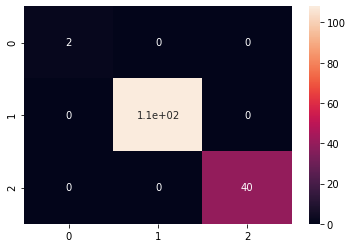

In [25]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True)

In [26]:
y_test_pred = xgb.predict(X_test) # corresponding output of X_test is stored in y_test
# Compare the actual y_test values with model predicted y_test_pred
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         1
         low       0.79      0.77      0.78        39
      medium       0.17      0.20      0.18        10

    accuracy                           0.64        50
   macro avg       0.32      0.32      0.32        50
weighted avg       0.65      0.64      0.64        50



C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


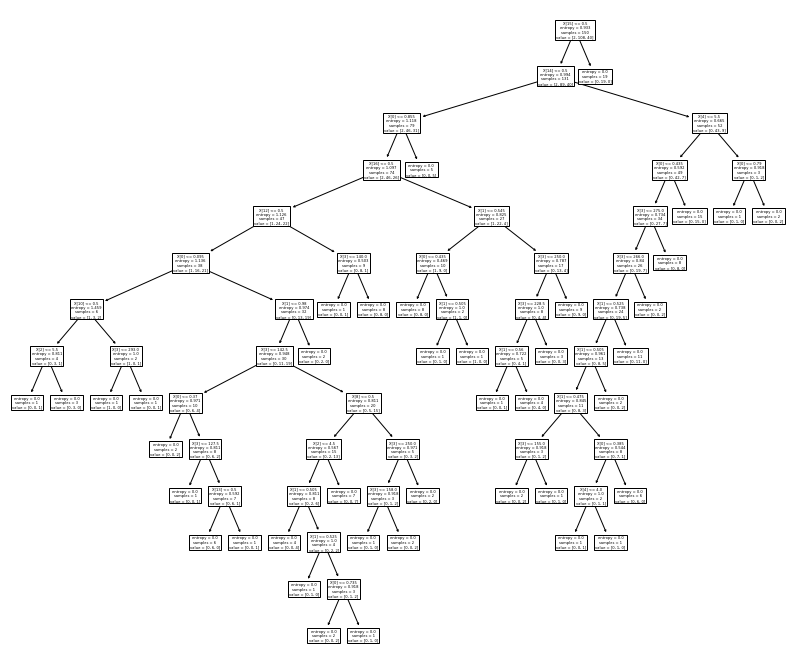

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(14,12))
tree.plot_tree(dtree)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
grid_param={'criterion' : ['gini','entropy'],
           'max_depth' : range(2,32,1),
           'min_samples_leaf' : range(1,10,1)}
grid_search = GridSearchCV(estimator=dtree,param_grid = grid_param)
clf = DecisionTreeClassifier()
# applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                 

In [29]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}

In [30]:
clf = DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_leaf=1)
# We need to fit the model to the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
# Prediction on test data
pred_test = clf.predict(X_test)
#Classification Report of actual values 
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00         1
         low       0.80      0.95      0.87        39
      medium       0.25      0.10      0.14        10

    accuracy                           0.76        50
   macro avg       0.35      0.35      0.34        50
weighted avg       0.68      0.76      0.71        50



C:\Users\snithika1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
